# Data Description

The dataset can be found on Kaggle: https://www.kaggle.com/c/informs2010/data

The INFORMS Data Mining Contest 2010 that can be found on Kaggle includes 608 features for almost 6000 time stamps, where each time step is equal to a 5 minute interval, across 75 trading days ranging from 04/01/2010 to 21/04/2010. The data contains a binary variable named "Target Variable",which can take the state of either 1 or 0, which we are seeking to predict. There are two data sets provide by Kaggle, training and test set.

The data set additionally includes pseudo feature names, with each of these features being labeled with one of the categories: ’OPEN, ’HIGH’, ‘LOW’, and either ‘LAST’ or ‘LAST PRICE’. These categories represent the value for the variable as the start of the timestep, the highest value in thetime step, the lowest value in the timestep, and the last value in the timestep, respectively.  Each trading day the market open at 9.30am and closes at 4.00pm and therefore taking a 5-minute interval equates to 79 timestamps per day. An example variable: "Variable141LAST_PRICE".

# Step 1, Import Data & Visualise 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set(color_codes=True)

#Read data
df = pd.read_csv("TrainingData.csv")

In [3]:
#Returning raw data to get a 'feel' for quality
df

,Timestamp (Date),Timestamp (Time),Variable142OPEN,Variable142HIGH,Variable142LOW,Variable142LAST,Variable143OPEN,Variable143HIGH,Variable143LOW,Variable143LAST,...,Variable137LOW,Variable137LAST_PRICE,Variable139OPEN,Variable139HIGH,Variable139LOW,Variable139LAST_PRICE,Variable141OPEN,Variable141HIGH,Variable141LOW,Variable141LAST_PRICE
0,04/01/2010,09:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.061874,21.206487,41.041731,42.338085,41.041731,42.108253,2.133044,2.174362,2.117550,2.117550
1,04/01/2010,09:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.206487,21.258134,42.108253,42.108253,41.881004,42.033364,2.117550,2.122715,2.117550,2.117550
2,04/01/2010,09:40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.268464,21.268464,42.033364,42.260614,41.803533,41.881004,2.122715,2.122715,2.112385,2.112385
3,04/01/2010,09:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.268464,21.309782,42.033364,42.185725,42.033364,42.108253,2.122715,2.122715,2.099473,2.099473
4,04/01/2010,09:50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.278794,21.309782,42.108253,42.185725,42.033364,42.108253,2.099473,2.099473,2.094308,2.099473
5,04/01/2010,09:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.309782,21.309782,42.033364,42.033364,41.881004,41.881004,2.099473,2.099473,2.089144,2.099473
6,04/01/2010,10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.278794,21.278794,41.803533,41.881004,41.728644,41.728644,2.089144,2.089144,2.083979,2.083979
7,04/01/2010,10:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.309782,21.351100,41.728644,41.728644,41.651172,41.728644,2.083979,2.089144,2.083979,2.083979
8,04/01/2010,10:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.351100,21.392418,41.728644,41.728644,41.651172,41.651172,2.083979,2.104638,2.083979,2.099473
9,04/01/2010,10:15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,21.330441,21.340771,41.651172,41.728644,41.498812,41.576283,2.099473,2.104638,2.099473,2.104638


Observation about the raw data:
- Missing data
- Contains continuous and categorical features 

Text(0.5, 0.98, 'Variable141 Time Period Data')

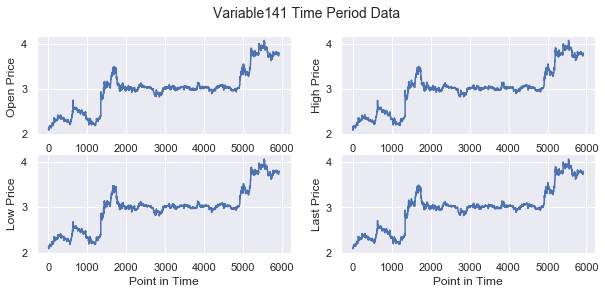

In [4]:
#Plot Variable141 Time Period Data
fig, ax = plt.subplots(2, 2,figsize=(10,4))

sns.lineplot(x=df.index, y="Variable141OPEN", data=df, ax=ax[0,0])
sns.lineplot(x=df.index, y="Variable141HIGH", data=df, ax=ax[0,1])
sns.lineplot(x=df.index, y="Variable141LOW", data=df, ax=ax[1,0])
sns.lineplot(x=df.index, y="Variable141LAST_PRICE", data=df, ax=ax[1,1])

ax[0,0].set(xlabel="Point in Time", ylabel="Open Price ")
ax[0,1].set(xlabel="Point in Time", ylabel="High Price")
ax[1,0].set(xlabel="Point in Time", ylabel="Low Price")
ax[1,1].set(xlabel="Point in Time", ylabel="Last Price")

fig.suptitle("Variable141 Time Period Data", fontsize=14)

We notice that each category of variables (Open, High, Low, and Last/Close Price), were very similar in nature. So we go ahead and calculate the correlation.

In [5]:
print('Correlation between open and high:',df['Variable141OPEN'].corr(df['Variable141HIGH']))
print('Correlation between open and low:',df['Variable141OPEN'].corr(df['Variable141LOW']))
print('Correlation between open and last price:',df['Variable141OPEN'].corr(df['Variable141LAST_PRICE']))
print('Correlation between high and low:',df['Variable141HIGH'].corr(df['Variable141LOW']))
print('Correlation between high and last price:',df['Variable141HIGH'].corr(df['Variable141LAST_PRICE']))
print('Correlation between low and last price:',df['Variable141LOW'].corr(df['Variable141LAST_PRICE']))

Correlation between open and high: 0.9996542298843416
Correlation between open and low: 0.9997868572642313
Correlation between open and last price: 0.9994985910700936
Correlation between high and low: 0.9995220382959965
Correlation between high and last price: 0.9998159549551681
Correlation between low and last price: 0.9996843605963674


In [6]:
#Drop 'OPEN', 'HIGH' and 'LOW'
df = df.loc[:,~df.columns.str.contains('OPEN', case=False)] 
df = df.loc[:,~df.columns.str.contains('HIGH', case=False)] 
df = df.loc[:,~df.columns.str.contains('LOW', case=False)] 
#Empty feature so drop and remove special character
df = df.drop(columns=['Variable158LAST'])
df = df.replace('-', np.nan)

We noticed that each category of variables (Open, High, Low, and Last Price), are very similar in nature, which can be made evident from figure above. We notice that the correlations between these categories are greater than 0.995. Since each category when compared to other categories provide similar information and little additional information, we chose to remove the Open, High, and Low variables. This decreased our number of explanatory features from 608 to 154.

# Step 2, Data Cleanse

In [7]:
#Pull out all the features
all_features = []
for col in df.columns: 
    all_features.append(str(col))
    
#Define categorical features
categorical_features = ['Variable142LAST','Variable143LAST',
                        'Variable144LAST','Variable145LAST',
                        'Variable146LAST','Variable147LAST',
                        'Variable148LAST','Variable149LAST',
                        'Variable150LAST','Variable151LAST',
                        'Variable152LAST','Variable153LAST',
                        'Variable154LAST','Variable155LAST',
                        'Variable156LAST','Variable161LAST',
                        'Variable162LAST','Variable163LAST',
                        'Variable167LAST','Variable168LAST',
                        'Variable169LAST','Variable170LAST',
                        'Variable171LAST','Variable172LAST',
                        'Variable173LAST','Variable174LAST',
                        'Variable175LAST','Variable176LAST',
                        'Variable177LAST','Variable178LAST',
                        'Variable179LAST','Variable180LAST',
                        'Variable105LAST_PRICE',
                         ]

#Define index related features
index_features = ['Timestamp (Date)','Timestamp (Time)','TargetVariable']

#Define continuous features
continuous_features_ = [elem for elem in all_features if elem not in index_features]
continuous_features = [elem for elem in continuous_features_ if elem not in categorical_features]
#Extract all continuous data
df_continuous = df[continuous_features]
#Forward fill any empty positions
dx = df_continuous.fillna(method='ffill')

We identified that the remaining data consists of both categorical and continuous data type. We split and branded these features as either continuous or categorical which we found to be 118 and 33 respectively.  The data appears to suffer from missing values, which were around 14%. Since our data is time series in nature we decided to impute missing values with a fill forward technique.

# Step 3, Calculate Return

It is often challenging to assess stock price movements based on raw stock price values because such time series data is observed to typically be non-linear, non-stationary and volatile in nature. Therefore, stock price data is often assessed based on percentage change upon each time step. Given it is the change in price value that we are looking to predict for the Target Variable, we believed it is sensible to consider the data in a similar approach. 

We therefore calculated the percentage change in each continuous variable $i$ and each 5 minute time period $t$, denoted as $z_{i,t}$, as calculated below using the original feature $v_{i,t}$ followed by the return $r_{i,t}$:
\begin{equation}
    z_{i,t} = \frac{v_{i,t} -v_{i,t-1} }{v_{i,t-1}}
\end{equation}
 \begin{equation}
    r_{i,t} = z_{i,t}+1
\end{equation}

In [8]:
#Calcualte the percentage change for each time step and feature
pct_change = dx.pct_change().drop(0)
#Remove corrupt data
pct_change['Variable22LAST_PRICE'] = pct_change['Variable22LAST_PRICE'].replace(-np.inf, 0.0)
pct_change['Variable22LAST_PRICE'] = pct_change['Variable22LAST_PRICE'].replace(np.inf, 0.0)
pct_change['Variable22LAST_PRICE'] = pct_change['Variable22LAST_PRICE'].replace(np.nan, 0.0)
pct_change['Variable22LAST_PRICE'] = pct_change['Variable22LAST_PRICE'].replace(-1.000000, 0.0)
#Add 1, to calculate the return z_i,t
ret = pct_change + 1
ret = ret.fillna(method='ffill')

# Step 4, Anomaly Detection

Many anomaly detection methods exist and are well documented online. The challenge we face is that our data is not labelled as a 'True' or 'False' anomaly point, therefore it is very difficult to confirm if we have determined the optimal true-postive and false-positve rate. Here we investigate 2 methods for anomaly detedction. 

- Isolation Forest (https://cs.nju.edu.cn/zhouzh/zhouzh.files/publication/icdm08b.pdf?q=isolation-forest)
- Tukey's Fences

However for the rest of this notebook we use Tukey's Fences, since we feel that Isolation Forest being an unsupervised approach will not be suitable for this use case. Never the less we do provide the code for how one can implement Isolation Forest. 

## 4.1 Isolation Forest - Anomaly detection (Method 1)

In [9]:
from sklearn.ensemble import IsolationForest
#There are many parameters and hyperparameters that can be played around. with 
model=IsolationForest(n_estimators=50, max_samples=100, contamination=float(0.0045),max_features=10, behaviour="new")
model=IsolationForest(contamination=float(0.0085), behaviour="new")
data_iso = ret[continuous_features]

model.fit(data_iso)

data_iso['scores'] = model.decision_function(data_iso[continuous_features])
data_iso['anomaly2'] = model.predict(data_iso[continuous_features])

#da = data_iso[continuous_features].mask(data_iso['anomaly2'] == -1)

## 4.2 Tukey's Fences - Anomaly detection (Method 2)

In [10]:
# Calculate first and third quantile
quantile = ret[continuous_features].quantile([.25,.75]).transpose()

#Calculate IQR
quantile['IQR'] = quantile[0.75] - quantile[0.25]

#Calculate upper and lower limit
quantile['Lower_Limit'] = quantile[0.25] - 4.5 * quantile['IQR']
quantile['Upper_Limit'] = quantile[0.75] + 4.5 * quantile['IQR']
quantile_limits = quantile[['Lower_Limit','Upper_Limit']].transpose().reset_index(level=0).drop(['index'],axis=1)

#Clipping any values outside the Tukey Fence
lower_clip = quantile['Lower_Limit'].to_dict()
upper_clip = quantile['Upper_Limit'].to_dict()
da = ret.clip(lower=pd.Series(lower_clip), upper=pd.Series(upper_clip), axis=1)
continuous_data = da.fillna(method='ffill')

#Detecting all values outside the min and max bounds
dp = ret.where(ret.ge(quantile_limits.iloc[0])&ret.lt(quantile_limits.iloc[1]))

#Count number of points across entire continuous variables that sit outside the min and max range
sum_ = []
for i in continuous_features:
    sum_.append(np.isnan(dp[i]).sum())
total_outliers = sum(sum_)
total_outliers

4154

We then removed outliers from the data, as irregular values may reduce the predictive accuracy of our models. We chose Tukey's fences as the methodology of removing outliers. Tukey's fences is a robust measure of detection, meaning that single values cannot materially change the measurement value. The approach calculates the range of "normal values" and considers all values outside the range to be outliers. The range of normal values for each feature $i$ is calculated as:

\begin{equation}
    \left[Q_{1,i}-k\left(Q_{3,i}-Q_{1,i}\right), Q_{3,i}+k\left(Q_{3,i}-Q_{1,i}\right)\right]=\left[Q_{1,i}-k \mathrm{IQR}(i), Q_{3,i}+k \operatorname{IQR}(i)\right]
    \label{eq:2}
\end{equation}

for given Quartile $Q_{1,i},Q_{3,i}$, interquartile range $IQR(i)$ for each feature. We chose constant $k$ to be equal to 4.5. This method was applied separately to each feature and values outside this were clipped to the lower and upper bound. Using this method we found that 0.54\% of the data containing continuous features were outliers.

# Step 5, Normalise Continuous Features by Standard Deviation for each Timestamp Group

We sought to understand whether the data is stationary.  We hypothesised that the variance is afunction of time, and would higher in the morning. We tested this by grouping together each sametime stamp throughout all 75 trading days, for each continuous feature and then we calculated thestandard deviation for each time stamp. We then averaged across each time stamp given all features.The plot of the average standard deviation for each 5 minute period is shown below. 

In [11]:
to_grouping = pd.merge(df[['Timestamp (Date)','Timestamp (Time)','TargetVariable']],continuous_data,left_index=True,right_index=True)
#Group all days by time stamp
gk = to_grouping.groupby('Timestamp (Time)') 

In [12]:
#obtain group for each timestamp
g1 = gk.get_group('09:30')
g2 = gk.get_group('09:35')
g3 = gk.get_group('09:40')
g4 = gk.get_group('09:45')
g5 = gk.get_group('09:50')
g6 = gk.get_group('09:55')

g7 = gk.get_group('10:00')
g8 = gk.get_group('10:05')
g9 = gk.get_group('10:10')
g10 = gk.get_group('10:15')
g11 = gk.get_group('10:20')
g12 = gk.get_group('10:25')
g13 = gk.get_group('10:30')
g14 = gk.get_group('10:35')
g15 = gk.get_group('10:40')
g16 = gk.get_group('10:45')
g17 = gk.get_group('10:50')
g18 = gk.get_group('10:55')

g19 = gk.get_group('11:00')
g20 = gk.get_group('11:05')
g21 = gk.get_group('11:10')
g22 = gk.get_group('11:15')
g23 = gk.get_group('11:20')
g24 = gk.get_group('11:25')
g25 = gk.get_group('11:30')
g26 = gk.get_group('11:35')
g27 = gk.get_group('11:40')
g28 = gk.get_group('11:45')
g29 = gk.get_group('11:50')
g30 = gk.get_group('11:55')

g31 = gk.get_group('12:00')
g32 = gk.get_group('12:05')
g33 = gk.get_group('12:10')
g34 = gk.get_group('12:15')
g35 = gk.get_group('12:20')
g36 = gk.get_group('12:25')
g37 = gk.get_group('12:30')
g38 = gk.get_group('12:35')
g39 = gk.get_group('12:40')
g40 = gk.get_group('12:45')
g41 = gk.get_group('12:50')
g42 = gk.get_group('12:55')

g43 = gk.get_group('13:00')
g44 = gk.get_group('13:05')
g45 = gk.get_group('13:10')
g46 = gk.get_group('13:15')
g47 = gk.get_group('13:20')
g48 = gk.get_group('13:25')
g49 = gk.get_group('13:30')
g50 = gk.get_group('13:35')
g51 = gk.get_group('13:40')
g52 = gk.get_group('13:45')
g53 = gk.get_group('13:50')
g54 = gk.get_group('13:55')

g55 = gk.get_group('14:00')
g56 = gk.get_group('14:05')
g57 = gk.get_group('14:10')
g58 = gk.get_group('14:15')
g59 = gk.get_group('14:20')
g60 = gk.get_group('14:25')
g61 = gk.get_group('14:30')
g62 = gk.get_group('14:35')
g63 = gk.get_group('14:40')
g64 = gk.get_group('14:45')
g65 = gk.get_group('14:50')
g66 = gk.get_group('14:55')

g67 = gk.get_group('15:00')
g68 = gk.get_group('15:05')
g69 = gk.get_group('15:10')
g70 = gk.get_group('15:15')
g71 = gk.get_group('15:20')
g72 = gk.get_group('15:25')
g73 = gk.get_group('15:30')
g74 = gk.get_group('15:35')
g75 = gk.get_group('15:40')
g76 = gk.get_group('15:45')
g77 = gk.get_group('15:50')
g78 = gk.get_group('15:55')

g79 = gk.get_group('16:00')

[Text(0, 0.5, 'Average Standard Deviation'),
 Text(0.5, 0, 'Time'),
 Text(0.5, 1.0, 'Average Standard Deviation Movement During The Day')]

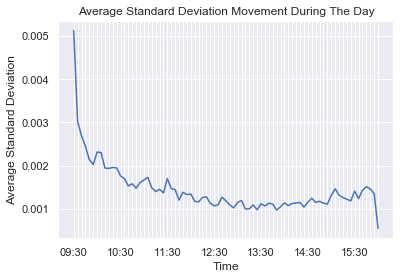

In [13]:
lst1 = []
lst2 = []
lst3 = []
lst4 = []
lst5 = []
lst6 = []
lst7 = []
lst8 = []
lst9 = []
lst10 = []

lst11 = []
lst12 = []
lst13 = []
lst14 = []
lst15 = []
lst16 = []
lst17 = []
lst18 = []
lst19 = []
lst20 = []

lst21 = []
lst22 = []
lst23 = []
lst24 = []
lst25 = []
lst26 = []
lst27 = []
lst28 = []
lst29 = []
lst30 = []

lst31 = []
lst32 = []
lst33 = []
lst34 = []
lst35 = []
lst36 = []
lst37 = []
lst38 = []
lst39 = []
lst40 = []

lst41 = []
lst42 = []
lst43 = []
lst44 = []
lst45 = []
lst46 = []
lst47 = []
lst48 = []
lst49 = []
lst50 = []

lst51 = []
lst52 = []
lst53 = []
lst54 = []
lst55 = []
lst56 = []
lst57 = []
lst58 = []
lst59 = []
lst60 = []

lst61 = []
lst62 = []
lst63 = []
lst64 = []
lst65 = []
lst66 = []
lst67 = []
lst68 = []
lst69 = []
lst70 = []

lst71 = []
lst72 = []
lst73 = []
lst74 = []
lst75 = []
lst76 = []
lst77 = []
lst78 = []
lst79 = []

for i in range(0,len(continuous_features)):
    lst1.append(g1[continuous_features].head(n=59).std(axis=0)[i])
    lst2.append(g2[continuous_features].head(n=60).std(axis=0)[i])
    lst3.append(g3[continuous_features].head(n=60).std(axis=0)[i])
    lst4.append(g4[continuous_features].head(n=60).std(axis=0)[i])
    lst5.append(g5[continuous_features].head(n=60).std(axis=0)[i])
    lst6.append(g6[continuous_features].head(n=60).std(axis=0)[i])
    lst7.append(g7[continuous_features].head(n=60).std(axis=0)[i])
    lst8.append(g8[continuous_features].head(n=60).std(axis=0)[i])
    lst9.append(g9[continuous_features].head(n=60).std(axis=0)[i])
    lst10.append(g10[continuous_features].head(n=60).std(axis=0)[i])
    lst11.append(g11[continuous_features].head(n=60).std(axis=0)[i])
    lst12.append(g12[continuous_features].head(n=60).std(axis=0)[i])
    lst13.append(g13[continuous_features].head(n=60).std(axis=0)[i])
    lst14.append(g14[continuous_features].head(n=60).std(axis=0)[i])
    lst15.append(g15[continuous_features].head(n=60).std(axis=0)[i])
    lst16.append(g16[continuous_features].head(n=60).std(axis=0)[i])
    lst17.append(g17[continuous_features].head(n=60).std(axis=0)[i])
    lst18.append(g18[continuous_features].head(n=60).std(axis=0)[i])
    lst19.append(g19[continuous_features].head(n=60).std(axis=0)[i])
    lst20.append(g20[continuous_features].head(n=60).std(axis=0)[i])
    lst21.append(g21[continuous_features].head(n=60).std(axis=0)[i])
    lst22.append(g22[continuous_features].head(n=60).std(axis=0)[i])
    lst23.append(g23[continuous_features].head(n=60).std(axis=0)[i])
    lst24.append(g24[continuous_features].head(n=60).std(axis=0)[i])
    lst25.append(g25[continuous_features].head(n=60).std(axis=0)[i])
    lst26.append(g26[continuous_features].head(n=60).std(axis=0)[i])
    lst27.append(g27[continuous_features].head(n=60).std(axis=0)[i])
    lst28.append(g28[continuous_features].head(n=60).std(axis=0)[i])
    lst29.append(g29[continuous_features].head(n=60).std(axis=0)[i])
    lst30.append(g30[continuous_features].head(n=60).std(axis=0)[i])
    lst31.append(g31[continuous_features].head(n=60).std(axis=0)[i])
    lst32.append(g32[continuous_features].head(n=60).std(axis=0)[i])
    lst33.append(g33[continuous_features].head(n=60).std(axis=0)[i])
    lst34.append(g34[continuous_features].head(n=60).std(axis=0)[i])
    lst35.append(g35[continuous_features].head(n=60).std(axis=0)[i])
    lst36.append(g36[continuous_features].head(n=60).std(axis=0)[i])
    lst37.append(g37[continuous_features].head(n=60).std(axis=0)[i])
    lst38.append(g38[continuous_features].head(n=60).std(axis=0)[i])
    lst39.append(g39[continuous_features].head(n=60).std(axis=0)[i])
    lst40.append(g40[continuous_features].head(n=60).std(axis=0)[i])
    lst41.append(g41[continuous_features].head(n=60).std(axis=0)[i])
    lst42.append(g42[continuous_features].head(n=60).std(axis=0)[i])
    lst43.append(g43[continuous_features].head(n=60).std(axis=0)[i])
    lst44.append(g44[continuous_features].head(n=60).std(axis=0)[i])
    lst45.append(g45[continuous_features].head(n=60).std(axis=0)[i])
    lst46.append(g46[continuous_features].head(n=60).std(axis=0)[i])
    lst47.append(g47[continuous_features].head(n=60).std(axis=0)[i])
    lst48.append(g48[continuous_features].head(n=60).std(axis=0)[i])
    lst49.append(g49[continuous_features].head(n=60).std(axis=0)[i])
    lst50.append(g50[continuous_features].head(n=60).std(axis=0)[i])
    lst51.append(g51[continuous_features].head(n=60).std(axis=0)[i])
    lst52.append(g52[continuous_features].head(n=60).std(axis=0)[i])
    lst53.append(g53[continuous_features].head(n=60).std(axis=0)[i])
    lst54.append(g54[continuous_features].head(n=60).std(axis=0)[i])
    lst55.append(g55[continuous_features].head(n=60).std(axis=0)[i])
    lst56.append(g56[continuous_features].head(n=60).std(axis=0)[i])
    lst57.append(g57[continuous_features].head(n=60).std(axis=0)[i])
    lst58.append(g58[continuous_features].head(n=60).std(axis=0)[i])
    lst59.append(g59[continuous_features].head(n=60).std(axis=0)[i])
    lst60.append(g60[continuous_features].head(n=60).std(axis=0)[i])
    lst61.append(g61[continuous_features].head(n=60).std(axis=0)[i])
    lst62.append(g62[continuous_features].head(n=60).std(axis=0)[i])
    lst63.append(g63[continuous_features].head(n=60).std(axis=0)[i])
    lst64.append(g64[continuous_features].head(n=60).std(axis=0)[i])
    lst65.append(g65[continuous_features].head(n=60).std(axis=0)[i])
    lst66.append(g66[continuous_features].head(n=60).std(axis=0)[i])
    lst67.append(g67[continuous_features].head(n=60).std(axis=0)[i])
    lst68.append(g68[continuous_features].head(n=60).std(axis=0)[i])
    lst69.append(g69[continuous_features].head(n=60).std(axis=0)[i])
    lst70.append(g70[continuous_features].head(n=60).std(axis=0)[i])
    lst71.append(g71[continuous_features].head(n=60).std(axis=0)[i])
    lst72.append(g72[continuous_features].head(n=60).std(axis=0)[i])
    lst73.append(g73[continuous_features].head(n=60).std(axis=0)[i])
    lst74.append(g74[continuous_features].head(n=60).std(axis=0)[i])
    lst75.append(g75[continuous_features].head(n=60).std(axis=0)[i])
    lst76.append(g76[continuous_features].head(n=59).std(axis=0)[i])
    lst77.append(g77[continuous_features].head(n=59).std(axis=0)[i])
    lst78.append(g78[continuous_features].head(n=59).std(axis=0)[i])
    lst79.append(g79[continuous_features].head(n=59).std(axis=0)[i])

import statistics as st
sd_lst = [st.mean(lst1),
          st.mean(lst2),
          st.mean(lst3),
          st.mean(lst4),
          st.mean(lst5),
          st.mean(lst6),
          st.mean(lst7),
          st.mean(lst8),
          st.mean(lst9),
          st.mean(lst10),
          st.mean(lst11),
          st.mean(lst12),
          st.mean(lst13),
          st.mean(lst14),
          st.mean(lst15),
          st.mean(lst16),
          st.mean(lst17),
          st.mean(lst18),
          st.mean(lst19),
          st.mean(lst20),
          st.mean(lst21),
          st.mean(lst22),
          st.mean(lst23),
          st.mean(lst24),
          st.mean(lst25),
          st.mean(lst26),
          st.mean(lst27),
          st.mean(lst28),
          st.mean(lst29),
          st.mean(lst30),
          st.mean(lst31),
          st.mean(lst32),
          st.mean(lst33),
          st.mean(lst34),
          st.mean(lst35),
          st.mean(lst36),
          st.mean(lst37),
          st.mean(lst38),
          st.mean(lst39),
          st.mean(lst40),
          st.mean(lst41),
          st.mean(lst42),
          st.mean(lst43),
          st.mean(lst44),
          st.mean(lst45),
          st.mean(lst46),
          st.mean(lst47),
          st.mean(lst48),
          st.mean(lst49),
          st.mean(lst50),
          st.mean(lst51),
          st.mean(lst52),
          st.mean(lst53),
          st.mean(lst54),
          st.mean(lst55),
          st.mean(lst56),
          st.mean(lst57),
          st.mean(lst58),
          st.mean(lst59),
          st.mean(lst60),
          st.mean(lst61),
          st.mean(lst62),
          st.mean(lst63),
          st.mean(lst64),
          st.mean(lst65),
          st.mean(lst66),
          st.mean(lst67),
          st.mean(lst68),
          st.mean(lst69),
          st.mean(lst70),
          st.mean(lst71),
          st.mean(lst72),
          st.mean(lst73),
          st.mean(lst74),
          st.mean(lst75),
          st.mean(lst76),
          st.mean(lst77),
          st.mean(lst78),
          st.mean(lst79)
         ]

sd_data = pd.DataFrame(sd_lst)
sd_data_time = pd.merge(df[index_features],sd_data,left_index=True,right_index=True)

plty = sns.lineplot(x='Timestamp (Time)', y=0, data=sd_data_time)
for ind, label in enumerate(plty.get_xticklabels()):
    if ind % 12 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plty.set(xlabel="Time", ylabel="Average Standard Deviation", title = 'Average Standard Deviation Movement During The Day')

Yes you probably read that last piece of monstrous code and thought well that could be written a lot more efficiently! And you are absolutely right! You can say it was lazy coding on my behalf, however I am result and hypothesis driven so did not pay too much attention to effecient code writing. Never the less I achieved what I was looking to find. 

Since there was evidence that variance is not constant throughout the day, we normalise the respective feature by the standard deviation $sd(r_{i,t})$ of the respective timestamp. For example in the case of 09.30, we group together all 09:30' and calculate the standard deviation of that, hence dividing all 09:30 price points by the standard deviation of 09:30. And so on for all other timestamps.

In [14]:
#Normalise each data group by standard deviation 
A = g1[continuous_features]/(g1[continuous_features].std(axis=0))
B = g2[continuous_features]/(g2[continuous_features].std(axis=0))
C = g3[continuous_features]/(g3[continuous_features].std(axis=0))
D = g4[continuous_features]/(g4[continuous_features].std(axis=0))
E = g5[continuous_features]/(g5[continuous_features].std(axis=0))
F = g6[continuous_features]/(g6[continuous_features].std(axis=0))
G = g7[continuous_features]/(g7[continuous_features].std(axis=0))
H = g8[continuous_features]/(g8[continuous_features].std(axis=0))
I = g9[continuous_features]/(g9[continuous_features].std(axis=0))
J = g10[continuous_features]/(g10[continuous_features].std(axis=0))
K = g11[continuous_features]/(g11[continuous_features].std(axis=0))
L = g12[continuous_features]/(g12[continuous_features].std(axis=0))
M = g13[continuous_features]/(g13[continuous_features].std(axis=0))
N = g14[continuous_features]/(g14[continuous_features].std(axis=0))
O = g15[continuous_features]/(g15[continuous_features].std(axis=0))
P = g16[continuous_features]/(g16[continuous_features].std(axis=0))
Q = g17[continuous_features]/(g17[continuous_features].std(axis=0))
R = g18[continuous_features]/(g18[continuous_features].std(axis=0))
S = g19[continuous_features]/(g19[continuous_features].std(axis=0))
T = g20[continuous_features]/(g20[continuous_features].std(axis=0))
U = g21[continuous_features]/(g21[continuous_features].std(axis=0))
V = g22[continuous_features]/(g22[continuous_features].std(axis=0))
W = g23[continuous_features]/(g23[continuous_features].std(axis=0))
X = g24[continuous_features]/(g24[continuous_features].std(axis=0))
Y = g25[continuous_features]/(g25[continuous_features].std(axis=0))
Z = g26[continuous_features]/(g26[continuous_features].std(axis=0))

AA = g27[continuous_features]/(g27[continuous_features].std(axis=0))
AB = g28[continuous_features]/(g28[continuous_features].std(axis=0))
AC = g29[continuous_features]/(g29[continuous_features].std(axis=0))
AD = g30[continuous_features]/(g30[continuous_features].std(axis=0))
AE = g31[continuous_features]/(g31[continuous_features].std(axis=0))
AF = g32[continuous_features]/(g32[continuous_features].std(axis=0))
AG = g33[continuous_features]/(g33[continuous_features].std(axis=0))
AH = g34[continuous_features]/(g34[continuous_features].std(axis=0))
AI = g35[continuous_features]/(g35[continuous_features].std(axis=0))
AJ = g36[continuous_features]/(g36[continuous_features].std(axis=0))
AK = g37[continuous_features]/(g37[continuous_features].std(axis=0))
AL = g38[continuous_features]/(g38[continuous_features].std(axis=0))
AM = g39[continuous_features]/(g39[continuous_features].std(axis=0))
AN = g40[continuous_features]/(g40[continuous_features].std(axis=0))
AO = g41[continuous_features]/(g41[continuous_features].std(axis=0))
AP = g42[continuous_features]/(g42[continuous_features].std(axis=0))
AQ = g43[continuous_features]/(g43[continuous_features].std(axis=0))
AR = g44[continuous_features]/(g44[continuous_features].std(axis=0))
AS = g45[continuous_features]/(g45[continuous_features].std(axis=0))
AT = g46[continuous_features]/(g46[continuous_features].std(axis=0))
AU = g47[continuous_features]/(g47[continuous_features].std(axis=0))
AV = g48[continuous_features]/(g48[continuous_features].std(axis=0))
AW = g49[continuous_features]/(g49[continuous_features].std(axis=0))
AX = g50[continuous_features]/(g50[continuous_features].std(axis=0))
AY = g51[continuous_features]/(g51[continuous_features].std(axis=0))
AZ = g52[continuous_features]/(g52[continuous_features].std(axis=0))

BA = g53[continuous_features]/(g53[continuous_features].std(axis=0))
BB = g54[continuous_features]/(g54[continuous_features].std(axis=0))
BC = g55[continuous_features]/(g55[continuous_features].std(axis=0))
BD = g56[continuous_features]/(g56[continuous_features].std(axis=0))
BE = g57[continuous_features]/(g57[continuous_features].std(axis=0))
BF = g58[continuous_features]/(g58[continuous_features].std(axis=0))
BG = g59[continuous_features]/(g59[continuous_features].std(axis=0))
BH = g60[continuous_features]/(g60[continuous_features].std(axis=0))
BI = g61[continuous_features]/(g61[continuous_features].std(axis=0))
BJ = g62[continuous_features]/(g62[continuous_features].std(axis=0))
BK = g63[continuous_features]/(g63[continuous_features].std(axis=0))
BL = g64[continuous_features]/(g64[continuous_features].std(axis=0))
BM = g65[continuous_features]/(g65[continuous_features].std(axis=0))
BN = g66[continuous_features]/(g66[continuous_features].std(axis=0))
BO = g67[continuous_features]/(g67[continuous_features].std(axis=0))
BP = g68[continuous_features]/(g68[continuous_features].std(axis=0))
BQ = g69[continuous_features]/(g69[continuous_features].std(axis=0))
BR = g70[continuous_features]/(g70[continuous_features].std(axis=0))
BS = g71[continuous_features]/(g71[continuous_features].std(axis=0))
BT = g72[continuous_features]/(g72[continuous_features].std(axis=0))
BU = g73[continuous_features]/(g73[continuous_features].std(axis=0))
BV = g74[continuous_features]/(g74[continuous_features].std(axis=0))
BW = g75[continuous_features]/(g75[continuous_features].std(axis=0))
BX = g76[continuous_features]/(g76[continuous_features].std(axis=0))
BY = g77[continuous_features]/(g77[continuous_features].std(axis=0))
BZ = g78[continuous_features]/(g78[continuous_features].std(axis=0))

CA = g79[continuous_features]/(g79[continuous_features].std(axis=0))

In [15]:
pre_ = pd.concat([A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI
                 ,AJ,AK,AL,AM,AN,AO,AP,AQ,AR,AS,AT,AU,AV,AW,AX,AY,AZ,BA,BB,BC,BD,BE,BF,BG,BH,BI,BJ
                 ,BK,BL,BM,BN,BO,BP,BQ,BR,BS,BT,BU,BV,BW,BX,BY,BZ,CA]).sort_index()
#Log transforming the data
pre_ = np.log(pre_)
#further data cleansing
pre_[['Variable102LAST_PRICE']] = pre_[['Variable102LAST_PRICE']].replace(np.inf, np.nan)
pre_[['Variable102LAST_PRICE']] = pre_[['Variable102LAST_PRICE']].fillna(method='ffill')


A common assumption in finance is to consider log-returns $Return_{i,t}$ as independent identically distributed (i.i.d.) normal random variables. By taking the log return when applying machine learning models, we can take sum up log returns as opposed to taking products. Also, since stock price data is stochastic in nature, log transformation allows the data to be distributed evenly.
\begin{equation}
     LogReturn_{i,t}= log\left(\frac{r_{i,t}}{sd(r_{i,t})}\right)
\end{equation}

In [16]:
continuous_merge = pd.merge(df[['Timestamp (Date)','Timestamp (Time)','TargetVariable']],pre_,left_index=True,right_index=True)
continuous_merge

,Timestamp (Date),Timestamp (Time),TargetVariable,Variable157LAST,Variable159LAST,Variable160LAST,Variable164LAST,Variable165LAST,Variable8LAST_PRICE,Variable9LAST_PRICE,...,Variable125LAST_PRICE,Variable126LAST_PRICE,Variable127LAST_PRICE,Variable129LAST_PRICE,Variable130LAST_PRICE,Variable133LAST_PRICE,Variable136LAST_PRICE,Variable137LAST_PRICE,Variable139LAST_PRICE,Variable141LAST_PRICE
1,04/01/2010,09:35,1,5.124093,6.725130,6.724982,5.811662,5.529196,6.305112,6.416560,...,5.730548,5.694557,5.608492,5.328330,6.060385,5.765875,5.347369,5.784981,5.066129,4.990838
2,04/01/2010,09:40,1,5.159849,6.861849,6.865365,5.974201,5.602689,6.417376,6.482771,...,5.774749,5.868888,5.654806,5.520279,6.245704,5.738883,5.491270,5.875933,5.194975,4.978846
3,04/01/2010,09:45,1,5.122343,6.731128,6.731128,6.340788,5.450770,6.542792,6.678853,...,5.871505,5.947686,5.622548,5.563382,6.498706,5.823994,5.325099,6.035488,5.346049,5.130593
4,04/01/2010,09:50,0,5.263068,7.009162,7.009162,6.313166,5.743561,6.845414,6.896226,...,6.035473,6.011499,6.035643,5.694366,6.378225,6.140117,5.434656,6.112555,5.233191,5.258721
5,04/01/2010,09:55,1,5.006455,6.936999,6.938196,6.294261,5.750672,6.691600,6.900732,...,6.022073,5.903075,5.892630,5.672135,6.509261,6.129409,5.672123,6.171800,5.403806,5.269562
6,04/01/2010,10:00,0,5.007192,6.578231,6.577957,6.152234,5.705291,6.457959,6.595355,...,5.962195,6.004980,5.916883,5.645354,6.491327,5.996585,5.507212,6.027897,5.377254,5.272903
7,04/01/2010,10:05,0,5.011472,6.712214,6.712214,6.222786,5.902440,6.584174,6.709048,...,5.922374,5.874944,5.855150,5.706240,6.407847,5.940845,5.584818,6.039156,5.540501,5.242933
8,04/01/2010,10:10,0,5.190676,6.747148,6.750209,6.444196,5.806096,6.598166,6.797699,...,6.142402,5.917954,6.026052,5.807301,6.594072,6.264039,5.659464,6.302932,5.482859,5.318225
9,04/01/2010,10:15,0,5.121025,6.789144,6.788753,6.344183,5.948261,6.715761,6.944450,...,6.061979,6.179685,6.033183,5.785929,6.556628,6.114501,5.800667,6.369900,5.440483,5.300536
10,04/01/2010,10:20,0,5.250548,6.626389,6.626253,6.377454,6.026563,6.573376,6.875233,...,6.217670,6.013521,6.022857,5.714497,6.628480,6.026167,5.834950,6.322441,5.543536,5.547183


Text(0.5, 0.98, 'Evolution Of Variable141 Last Price Distribution')

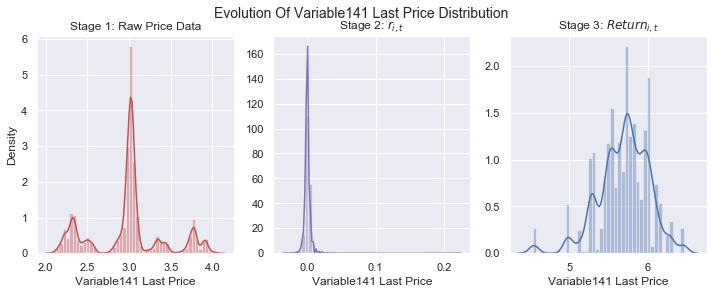

In [17]:
fig, ax = plt.subplots(1,3,figsize=(12,4))
sns.distplot(df['Variable141LAST_PRICE'], color="r",ax=ax[0])
sns.distplot(pct_change['Variable141LAST_PRICE'],  color="m",ax=ax[1])
sns.distplot(pre_['Variable141LAST_PRICE'], color="b",ax=ax[2])

ax[0].set(xlabel="Variable141 Last Price", ylabel="Density",title = 'Stage 1: Raw Price Data')
ax[1].set(xlabel="Variable141 Last Price",title = 'Stage 2: $r_{i,t}$')
ax[2].set(xlabel="Variable141 Last Price",title = 'Stage 3: $Return_{i,t}$')
fig.suptitle("Evolution Of Variable141 Last Price Distribution", fontsize=14)

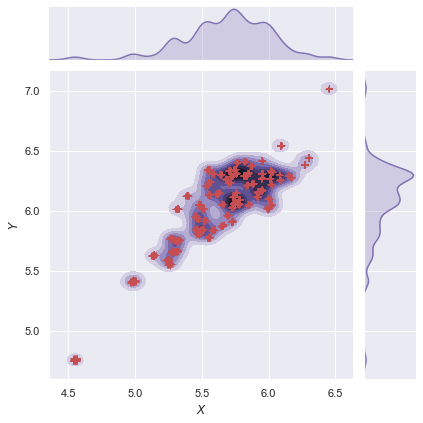

In [18]:
g = sns.jointplot(x="Variable141LAST_PRICE", y="Variable121LAST_PRICE", data=pre_ ,kind='kde', color="m")
g.plot_joint(plt.scatter, c="r", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

# Step 6, Handle Categorical Features

In [20]:
impute_minus_1_features = ['Variable142LAST','Variable143LAST',
                        'Variable144LAST','Variable145LAST',
                        'Variable146LAST','Variable147LAST',
                        'Variable148LAST','Variable149LAST',
                        'Variable150LAST','Variable151LAST',
                        'Variable152LAST','Variable153LAST',
                        'Variable154LAST','Variable155LAST',
                        'Variable156LAST','Variable161LAST',
                        'Variable162LAST','Variable163LAST',
                         ]

fill_forward_features = ['Variable167LAST','Variable168LAST',
                        'Variable169LAST','Variable170LAST',
                        'Variable171LAST','Variable172LAST',
                        'Variable173LAST','Variable174LAST',
                        'Variable175LAST','Variable176LAST',
                        'Variable177LAST','Variable178LAST',
                        'Variable179LAST','Variable180LAST',
                        'Variable105LAST_PRICE',
                         ]

cat_data = df[categorical_features]

cat_data[impute_minus_1_features] = cat_data[impute_minus_1_features].fillna(-1.0)
cat_data[fill_forward_features] = cat_data[fill_forward_features].fillna(method='ffill')
cat_data_merged = pd.merge(df[index_features],cat_data,left_index=True,right_index=True).drop(0)
#One hot encode
cat_hot_encoded = pd.get_dummies(data=cat_data, columns=categorical_features).drop(0)
cat_hot_encoded

,Variable142LAST_-1.0,Variable142LAST_0.0,Variable142LAST_0,Variable143LAST_-1.0,Variable143LAST_0.0,Variable144LAST_-1.0,Variable144LAST_0.0,Variable145LAST_-1.0,Variable145LAST_0.0,Variable146LAST_-1.0,...,Variable105LAST_PRICE_1.420307819,Variable105LAST_PRICE_1.4228901969999999,Variable105LAST_PRICE_1.425472575,Variable105LAST_PRICE_1.4280549530000002,Variable105LAST_PRICE_1.430637331,Variable105LAST_PRICE_1.433219709,Variable105LAST_PRICE_1.435802087,Variable105LAST_PRICE_1.438384464,Variable105LAST_PRICE_1.440966842,Variable105LAST_PRICE_1.44354922
1,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


For categorical data, in our initial analysis we found that certain categories contained integers whilst other categories posed floating point values with 5+ decimal places. To handle missing data for all 4
categorical features with only discrete integers, we replaced empty positions with ‘-1’. For categories with floating point values, we applied a forward fill technique. Finally, we applied one-hot encoding which increased the number categorical dimensions from 33 to 822